# Ejercicios Pair Programming - Módulo 2 Sprint 1
## Lección 4 - Repaso Visualización y Estadística
### Noemi Azorin y Silvia Gordón

Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import skew

In [100]:
#nuestro dataseet elegido proviene de kaggle y muestra el top de las canciones más populares en Tik Tok del 2022.

tiktok = pd.read_csv("./Datasets/TikTok_songs_2022.csv")
tiktok.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


Hacer una exploración inicial del dataframe.

.- ¿Cuántas filas tiene? ¿Cuántas nulos tiene? ¿Y duplicados? ¿Qué tipo de datos tenemos en el dataframe? etc.

Exploramos el dataset en detalle con la función info()

In [101]:
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

Apreciamos que nuestras columnas la mayoría son de numéricas ya que corresponden a las características de la propia canción.

Mostramos las columnas que tiene nuestro dataset

In [102]:
tiktok.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

Mostramos los principales estadísticos tanto de las variables numéricas como categóricas

In [103]:
tiktok.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_pop,263.0,64.186312,18.146338,18.000000,50.00000,64.000000,81.000000,95.000
track_pop,263.0,59.844106,24.976524,0.000000,47.00000,66.000000,79.500000,97.000
danceability,263.0,0.715338,0.117722,0.308000,0.64600,0.726000,0.796500,0.961
energy,263.0,0.682631,0.141756,0.214000,0.59300,0.701000,0.790500,0.955
loudness,263.0,-6.300513,1.905114,-13.468000,-7.42350,-6.067000,-4.887000,-2.634
mode,263.0,0.536122,0.499644,0.000000,0.00000,1.000000,1.000000,1.000
key,263.0,5.809886,3.657312,0.000000,2.00000,6.000000,9.000000,11.000
speechiness,263.0,0.117268,0.101417,0.025200,0.04475,0.070700,0.156000,0.481
acousticness,263.0,0.193188,0.214588,0.000038,0.02810,0.120000,0.298500,0.965
instrumentalness,263.0,0.020244,0.109370,0.000000,0.00000,0.000003,0.000334,0.939


In [104]:
tiktok.describe(include="object").T

,count,unique,top,freq
track_name,263,258,Say It Right,2
artist_name,263,199,Doja Cat,8
album,263,251,Planet Her,4


Para poder ver mejor el ranking de artistas más escuchados en TikTok ordenamos nuestro Dataframe por "artist_pop" que nos evalúa los artistas con mejor posición en el ranking.

In [105]:
tiktok.sort_values(["artist_pop"], axis=0,
                 ascending=True, inplace=True)


In [106]:
tiktok.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
204,Red Flag,Pia Baris,18,Red Flag,31,0.715,0.706,-5.804,0,4,0.3830,0.3260,0.000231,0.5250,0.348,126.069,4,137431
224,Old Times,Xtinctor,21,Old Times,38,0.581,0.718,-5.631,1,1,0.0851,0.0195,0.000000,0.0750,0.149,92.992,4,184516
65,We Know,JAM & Philly,21,We Know,39,0.871,0.819,-6.022,0,4,0.2560,0.1420,0.000000,0.1060,0.712,112.114,4,198982
193,Over You,Myrrhe,26,Over You,37,0.863,0.325,-7.864,1,0,0.3410,0.6670,0.000017,0.1000,0.537,98.948,4,126314
40,That Bxtch,Taylor Watson,29,That Bxtch,47,0.645,0.681,-5.961,1,4,0.1390,0.0370,0.000000,0.0783,0.458,163.870,4,142644


Mostramos si hay duplicados o no en nuestro dataset

In [107]:
print(f"Nuestro número de duplicados es = {tiktok.duplicated().sum()}")

Nuestro número de duplicados es = 0


Mostramos los valores únicos en nuestro dataframe

In [119]:
print(f"Los valores únicos que hay en nuestro dataframe son: {tiktok.value_counts().sum()}")

Los valores únicos que hay en nuestro dataframe son: 263


Mostramos los valores nulos de nuestro dataframe

In [109]:
tiktok.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

Comprobamos que no hay valores nulos en todo el Dataframe.

Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

### Pregunta: ¿Los usuarios de tik tok escuchan el album de los artistas o solo algunas canciones?

1.- Para poder responder a esta pregunta empezaremos con una tabla de contigencia entre "artist_name" y "album_name" para ver si más de una canción de un mismo album está en el top de canciones de tik-tok.

In [110]:
# Vemos primero los valores únicos de la categoría artist_name
tiktok["artist_name"].value_counts()

Doja Cat          8
Coopex            6
Dame Dame         5
Lil Nas X         4
YES YES           4
                 ..
SAYGRACE          1
Alfons            1
Emmy Meli         1
StaySolidRocky    1
Duke & Jones      1
Name: artist_name, Length: 199, dtype: int64

In [111]:
# Vemos también los valores únicos de la categoría album
tiktok["album"].value_counts()

Planet Her                              4
Shoot For The Stars Aim For The Moon    3
Without You                             2
On My Way                               2
Forever                                 2
                                       ..
Boys Ain't Shit                         1
Lovely                                  1
I AM WOMAN                              1
Party Girl                              1
Dark Lane Demo Tapes                    1
Name: album, Length: 251, dtype: int64

In [112]:
tiktok_crosstab = pd.crosstab(tiktok["artist_name"], tiktok["album"])
tiktok_crosstab.tail()

album,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",AMG,ARDIPITHECUS,About Damn Time,Aesthetic,Afraid To Feel,After Hours,Ameno Amapiano Remix (You Wanna Bamba),Apologize,As It Was,...,Young Folks,abcdefu,channel ORANGE,credit union,deadroses,death bed (coffee for your head),drivers license,edamame (feat. Rich Brian),hot girl bummer,positions
artist_name,,,,,,,,,,,,,,,,,,,,,
bbno$,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
blackbear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
loafers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sad girls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sped up nightcore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tras realizar este primer análisis de album y artist_name nos damos cuenta que la escucha de los usuarios de tiktok hacia un artista corresponde a una canción de un mismo album, es decir, no escuchan el album entero.

### Pregunta: ¿Cómo de relacionadas están nuestras variables numéricas?

2.- Para saber la relación de cada una de nuestras variables numéricas realizaremos un análisis del coeficiente de correlación entre todas nuestras variables cuantitativas.

In [113]:
tiktok_corr = tiktok.corr()
tiktok_corr

/tmp/ipykernel_1261/3256620652.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tiktok_corr = tiktok.corr()


,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
artist_pop,1.000000,0.528718,0.025500,-0.182508,0.121257,0.003254,-0.031555,-0.044713,0.061327,-0.072859,-0.197161,0.163149,-0.043446,-0.035407,0.380424
track_pop,0.528718,1.000000,-0.069720,-0.043791,0.095679,0.002747,-0.154423,-0.075914,0.031077,-0.064372,-0.127429,0.106094,-0.030809,0.056081,0.225119
danceability,0.025500,-0.069720,1.000000,-0.119912,0.108099,-0.033789,0.077736,0.194117,-0.012272,-0.068245,-0.161132,0.370981,-0.260987,0.089076,-0.121832
energy,-0.182508,-0.043791,-0.119912,1.000000,0.585077,-0.072749,0.103403,-0.102667,-0.459485,0.102296,0.136489,0.048231,0.085686,0.060364,-0.090278
loudness,0.121257,0.095679,0.108099,0.585077,1.000000,-0.049226,0.087612,-0.088429,-0.388096,-0.054539,0.070948,0.171599,0.032130,0.008168,0.012136
mode,0.003254,0.002747,-0.033789,-0.072749,-0.049226,1.000000,-0.035913,-0.005939,0.024502,0.023045,-0.052448,-0.056816,-0.009931,-0.018849,-0.047168
key,-0.031555,-0.154423,0.077736,0.103403,0.087612,-0.035913,1.000000,0.053440,-0.022624,0.062806,-0.008231,0.040375,0.032613,0.008978,0.021573
speechiness,-0.044713,-0.075914,0.194117,-0.102667,-0.088429,-0.005939,0.053440,1.000000,0.102901,-0.070364,0.021062,0.018362,0.114708,0.116187,-0.185791
acousticness,0.061327,0.031077,-0.012272,-0.459485,-0.388096,0.024502,-0.022624,0.102901,1.000000,0.061498,0.005345,-0.071331,-0.085322,0.003365,0.025784
instrumentalness,-0.072859,-0.064372,-0.068245,0.102296,-0.054539,0.023045,0.062806,-0.070364,0.061498,1.000000,-0.042860,0.033459,-0.023723,0.019530,-0.053660


Creamos un gráfico de mapa de calor para poder visualizar mejor estos datos.

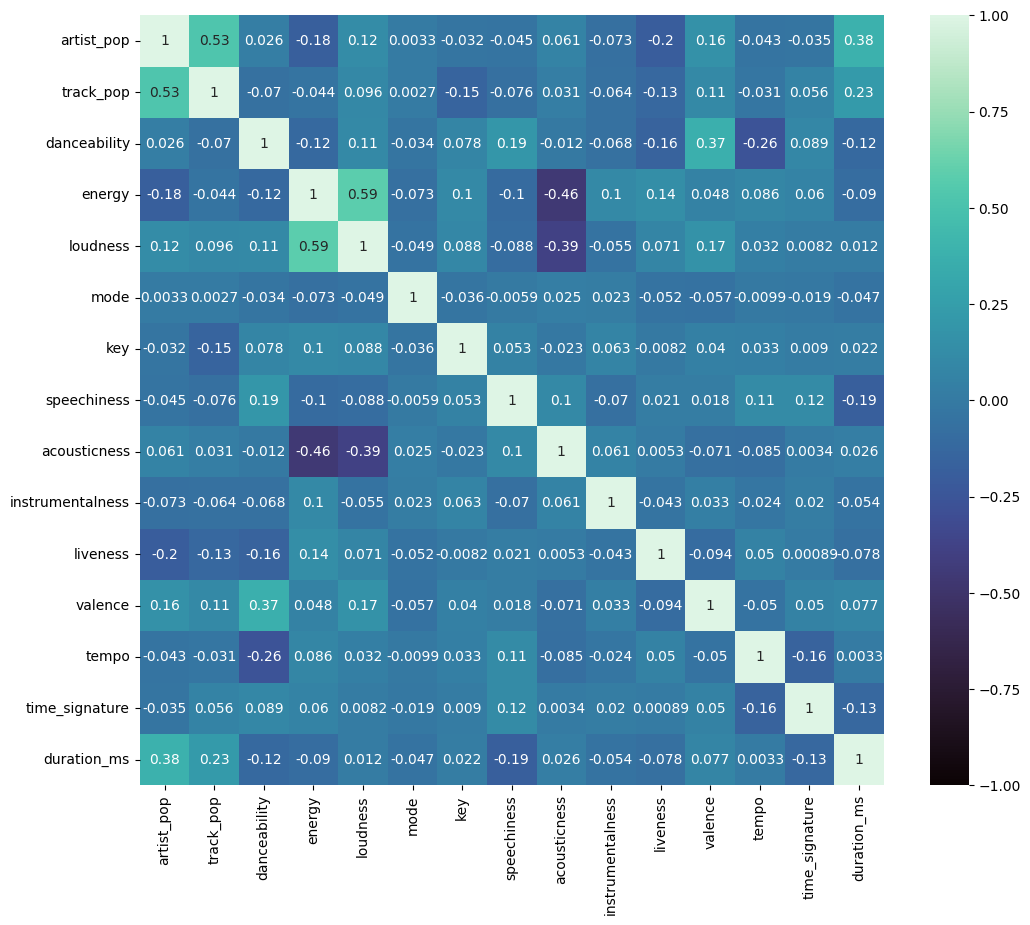

In [114]:
plt.figure(figsize=(12,10))
fig = sns.heatmap(tiktok_corr, cmap="mako", annot=True, vmin=-1, vmax=1)
plt.show()

.- Relación artist_pop (popularidad del artista) - track_pop (popularidad de la canción) = vemos que es una correlación positiva moderada. Esto nos quiere decir que a mayor popularidad del artista, mayor popularidad de la canción.

.- Relación de acusticness (acústica de la canción) - loudness (ruido de la canción) = vemos que es una correlación negativa baja. Esto nos quiere decir que a mayor acústica en la canción menos ruido tiene.

A modo general estamos viendo que la correlación entre las variables numéricas es bastante homogénea, ya que la mayoría de las variables dependen de las características de cada canción.

### Pregunta: ¿Cómo de dispersos están nuestros datos en función del artista escuchado?

3.- Para evaluar la dispersión de nuestros datos procederemos a conocer la simetría del sesgo

Creamos un distplot para ver el sesgo de forma mucho más visual para la categoría Artista. En nuestro caso para ver una aproximación del sesgo hemos decidido realizar la visualización de diez en diez, ya que así nos quedará una gráfica fácil de comprender y analizar:

/tmp/ipykernel_1261/2186763985.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.displot(tiktok["artist_name"][0::10], color="blueviolet", kde=True)


<Figure size 1500x1000 with 0 Axes>

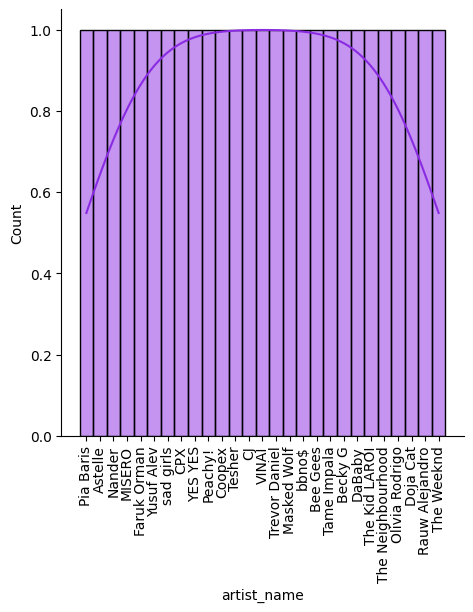

In [115]:
plt.figure(figsize=(15,10))
sns.displot(tiktok["artist_name"][0::10], color="blueviolet", kde=True)
plt.xticks(rotation=90)
plt.show()

In [116]:
tiktok_sesgo = skew(tiktok["artist_pop"])
print(f"El valor del sesgo para la popularidad de los artistas es: {tiktok_sesgo}")

El valor del sesgo para la popularidad de los artistas es: -0.28804379462304897


Como vemos en este gráfico para los artistas la simetría es practicamente total, ya que el valor de nuestro sesgo es de -0.28 que está sesgado a la izquierda pero es muy leve el sesgo que se ve.

### Conclusión

En este Dataframe lo que podemos apreciar tras el análisis de nuestros datos es que no varía mucho el top en función de más escuchado y menos de la lista, ya que la propia lista nos da un ranking de los más escuchados por lo tanto tendrán muchas escuchas todos ellos. 

Por otro lado, apreciamos que en TikTok se premia más la canción que el propio album del artista, es decir, lo importante para el usuario de TikTok es la canción, sin darle importancia alguna al album del que sale.

Por último, la mayoría de las variables numéricas que aparecen en el Dataframe corresponden a las características propias de la canción por lo que apreciamos que canciones con más "energy" pueden ser más escuchadas pero es un baremo que no es tan fiable como si la canción se viraliza o no en el propio TikTok. 